In [118]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [120]:
filename="../analysis_relu0.98.xlsx"

In [121]:
data = pd.read_excel(filename)

In [122]:
def flatten(df):
    names = df.columns.names
    values = df.columns.values
    cols = []
    m = len(names)
    n = len(values)
    for i in range(n):
        s = ''
        for j in range(m):
            if names[j] and str(values[i][j]):
                s += str(names[j]) + '-'
            if str(values[i][j]):
                s += str(values[i][j]) + '-'
        cols.append(s[:-1])
    df.columns = cols
    return df

def geometric_mean(x):
    return np.exp(np.mean(np.log(x)))

def to_exp_str(l):
    return [f"$2^{{{np.log2(x)}}}$" for x in l]

def format_ax(ax):
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())

In [123]:
data_pivot = pd.pivot( 
    data, 
    index=['d', 'M', 'T', 'act', 'noise'],
    columns=['hidden-layers'],
    values=['epsilon'],
).reset_index()
data_pivot = flatten(data_pivot).dropna()
data_pivot['ratio-2-1'] = data_pivot['epsilon-hidden-layers-2'] / data_pivot['epsilon-hidden-layers-1']
data_pivot['ratio-3-1'] = data_pivot['epsilon-hidden-layers-3'] / data_pivot['epsilon-hidden-layers-1']

In [124]:
data_pivot

,d,M,T,act,noise,epsilon-hidden-layers-1,epsilon-hidden-layers-2,epsilon-hidden-layers-3,ratio-2-1,ratio-3-1
0,1,1,8,relu,0.1,0.154869,0.195845,0.119926,1.264582,0.774370
1,1,1,8,relu,0.2,0.159200,0.145257,0.208844,0.912416,1.311834
2,1,1,16,relu,0.1,0.053632,0.040397,0.038792,0.753233,0.723304
3,1,1,16,relu,0.2,0.071998,0.053688,0.049712,0.745679,0.690468
4,1,1,32,relu,0.1,0.016285,0.012208,0.014844,0.749654,0.911543
...,...,...,...,...,...,...,...,...,...,...
518,64,64,65536,relu,0.1,0.005860,0.010777,0.013165,1.839214,2.246666
519,64,64,65536,relu,0.2,0.019652,0.027238,0.030211,1.386007,1.537253
520,64,64,131072,relu,0.1,0.002803,0.004874,0.006665,1.738654,2.377772
521,64,64,131072,relu,0.2,0.010263,0.014719,0.017678,1.434194,1.722477


In [125]:
print(geometric_mean(data_pivot['ratio-2-1']))
print(geometric_mean(data_pivot['ratio-3-1']))

1.1187753055774166
1.2019054895654369


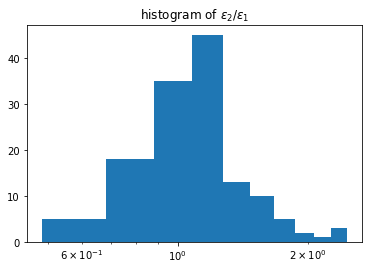

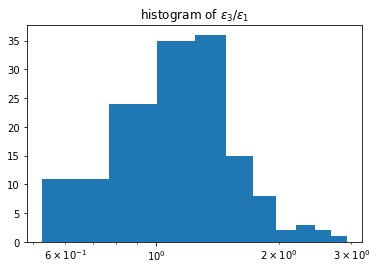

In [126]:
plt.hist( 
    data_pivot['ratio-2-1'],
)
plt.xscale('log')
plt.title("histogram of $\\epsilon_2/\\epsilon_1$")
plt.show()
plt.hist( 
    data_pivot['ratio-3-1'],
)
plt.xscale('log')
plt.title("histogram of $\\epsilon_3/\\epsilon_1$")
plt.show()

In [127]:
def scatter_plot(ax, data, x_col, y_cols, x_label, y_labels, reference=None):
    legends = []
    if reference is not None:
        ax.hlines( 
            reference, 
            data[x_col].min(), 
            data[x_col].max(),
            colors='black',
        )
        legends.append('reference')
    colors = plt.cm.viridis(np.linspace(0, 1, len(y_cols)))
    for y_col, y_label, c in zip(y_cols, y_labels, colors):
        ax.scatter( 
            x = data[x_col],
            y = data[y_col],
            alpha = 0.3,
            color=c,
        )
        legends.append(f"{y_label} scatter")
        temp = data.groupby(x_col).agg({
            y_col: geometric_mean
        }).reset_index()
        ax.plot( 
            temp[x_col], 
            temp[y_col],
            color=c,
        )
        legends.append(f"{y_label} geometric mean")
    format_ax(ax)
    ax.set_xticks(data[x_col])
    ax.set_xticklabels(to_exp_str(data[x_col]))
    ax.set_xlabel(x_label)
    ax.legend(legends)
    return ax

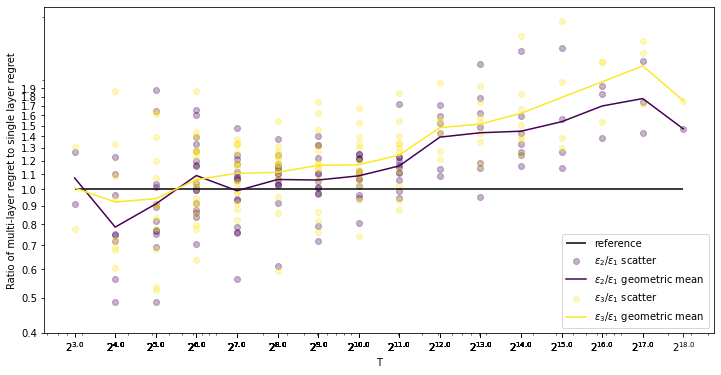

In [128]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = scatter_plot(
    ax,
    data_pivot, 
    "T",
    ["ratio-2-1", "ratio-3-1"],
    "T",
    ['$\epsilon_2/\epsilon_1$', '$\epsilon_3/\epsilon_1$'],
    reference=1,
)
ax.set_ylabel("Ratio of multi-layer regret to single layer regret")
ax.set_yticks(np.arange(0.4, 2, 0.1))
plt.show()

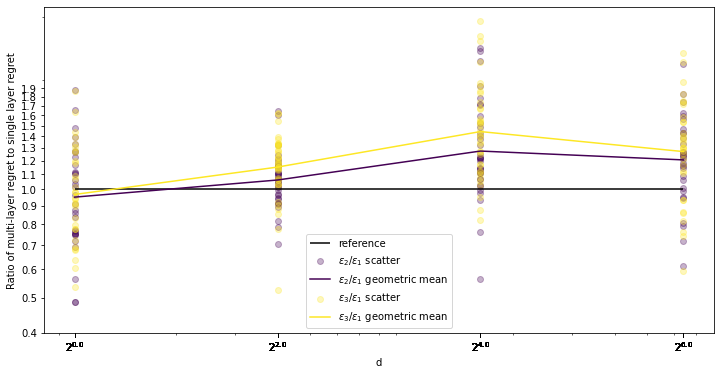

In [129]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = scatter_plot(
    ax,
    data_pivot, 
    "d",
    ["ratio-2-1", "ratio-3-1"],
    "d",
    ['$\epsilon_2/\epsilon_1$', '$\epsilon_3/\epsilon_1$'],
    reference=1,
)
ax.set_ylabel("Ratio of multi-layer regret to single layer regret")
ax.set_yticks(np.arange(0.4, 2, 0.1))
plt.show()

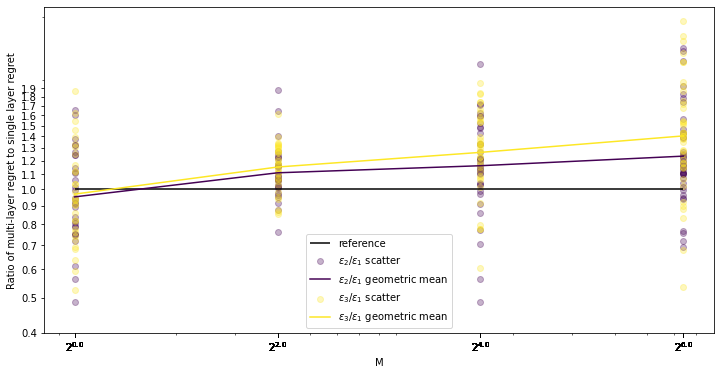

In [130]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = scatter_plot(
    ax,
    data_pivot, 
    "M",
    ["ratio-2-1", "ratio-3-1"],
    "M",
    ['$\epsilon_2/\epsilon_1$', '$\epsilon_3/\epsilon_1$'],
    reference=1,
)
ax.set_ylabel("Ratio of multi-layer regret to single layer regret")
ax.set_yticks(np.arange(0.4, 2, 0.1))
plt.show()

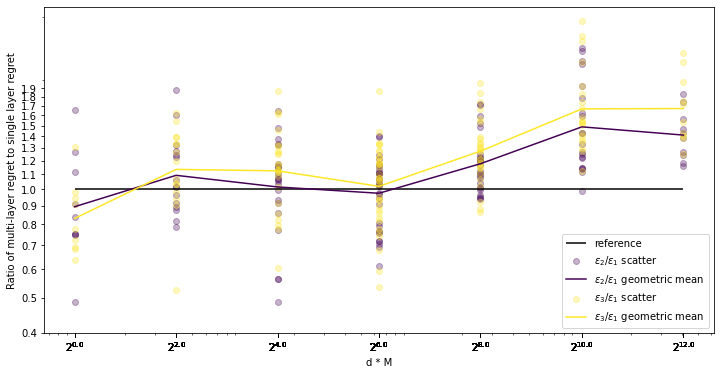

In [131]:
temp = data_pivot.copy()
temp["dM"] = temp["d"] * temp["M"]
fig, ax = plt.subplots(figsize=(12, 6))
ax = scatter_plot(
    ax,
    temp, 
    "dM",
    ["ratio-2-1", "ratio-3-1"],
    "d * M",
    ['$\epsilon_2/\epsilon_1$', '$\epsilon_3/\epsilon_1$'],
    reference=1,
)
ax.set_ylabel("Ratio of multi-layer regret to single layer regret")
ax.set_yticks(np.arange(0.4, 2, 0.1))
plt.show()